# Import Libraries 

In [1]:
import torch
import torch.nn as nn
import torch.utils as utils
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Train MLP for CIFAR-10

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 1000, Loss: 2.036
Epoch 2, Batch 1000, Loss: 1.741
Epoch 3, Batch 1000, Loss: 1.651
Epoch 4, Batch 1000, Loss: 1.587
Epoch 5, Batch 1000, Loss: 1.534
Epoch 6, Batch 1000, Loss: 1.497
Epoch 7, Batch 1000, Loss: 1.456
Epoch 8, Batch 1000, Loss: 1.423
Epoch 9, Batch 1000, Loss: 1.406
Epoch 10, Batch 1000, Loss: 1.377


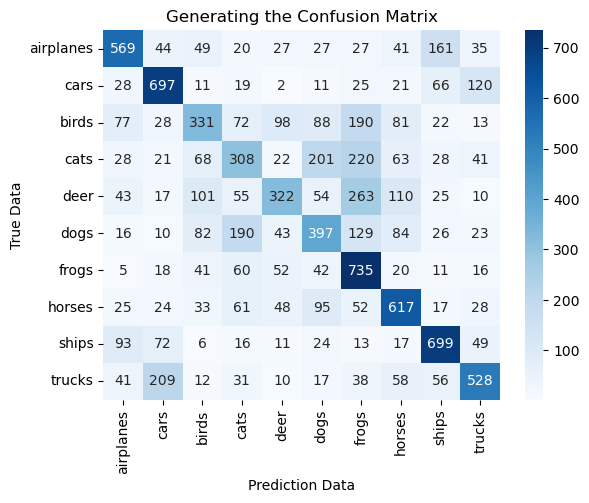

In [2]:
class model1(nn.Module):
    def __init__(self): #constructor
        super(model1, self).__init__()
        self.flatten = nn.Flatten() #flatten the input data
        self.fc1 = nn.Linear(3 * 32 * 32, 256) #fully connected layer
        self.relu1 = nn.ReLU() #ReLU activation
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128) #2nd layer
        self.relu2 = nn.ReLU() #ReLU activation
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 10) #outer layer

    #forward pass
    def forward(self, x):
        x = self.flatten(x) #used to flatten the input data
        x = self.fc1(x) #flatten data passes through first layer
        x = self.relu1(x) #apply the relu activation function to the output of the first hidden layer
        x = self.dropout1(x)
        x = self.fc2(x) #output from relu passes through the output layer 
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


#loading of the fashion data
load_train_data = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
load_test_data = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_dataset = DataLoader(load_train_data, batch_size=32, shuffle=True)
test_dataset = DataLoader(load_test_data, batch_size=32, shuffle=False)    
    
classes = ('airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks')

MLP = model1()

loss_func = nn.CrossEntropyLoss()
initial_learning_rate = 0.001
optimizer = torch.optim.SGD(MLP.parameters(), lr=initial_learning_rate, momentum=0.9, weight_decay=0.0001)
epochs = 10

#train the model 
for x in range(epochs):
    overall_loss = 0.0
    for i, data in enumerate(train_dataset,0):
        x_data, y_data = data
        optimizer.zero_grad()
        output = MLP(x_data)
        loss = loss_func(output, y_data)
        loss.backward()
        optimizer.step()
        overall_loss += loss.item()
        
        #print the loss at every epochs 
        if i % 1000 == 999:
            print(f"Epoch {x + 1}, Batch {i+1}, Loss: {overall_loss / 1000:.3f}")
            overall_loss = 0.0
        
#eval the model 
MLP.eval()
total_output = 0
correct_output = 0
predicted_output = []
true_output = []

with torch.no_grad():
    for data in test_dataset:
        x_data, y_data = data
        output = MLP(x_data)
        _, predicted = torch.max(output.data, 1)
        total_output += y_data.size(0)
        correct_output += (predicted == y_data).sum().item()
        predicted_output.extend(predicted.numpy())
        true_output.extend(y_data.numpy())
        
output_accuracy = correct_output / total_output

#confusion matrix 
confusion_matrix_output = confusion_matrix(true_output, predicted_output)
sns.heatmap(confusion_matrix_output, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prediction Data')
plt.ylabel('True Data')
plt.title('Generating the Confusion Matrix')
plt.show()

In [3]:
#Which two classes (object types) are most likely to be confused overall?
np.fill_diagonal(confusion_matrix_output, 0)
max_index = np.argmax(confusion_matrix_output)
row, col = divmod(max_index, confusion_matrix_output.shape[1])
print(f"The two most confused classes are: {row} and {col}")

The two most confused classes are: 4 and 6
